## Exercício de Tensorflow e Keras

O cojunto de dados que será trabalhado neste exerício chama-se landing club. Lending Club é o maior centro de empréstimos de pessoa para pessoa que existe, os dados são de cada uma das pessoas que fizeram um empréstimo e tentar fazer um programa que possa entender através da diversidade apresentada no conjunto se a pessoa pagará ou não o empréstimo feito. E caso outra pessoa faça um empréstimo na mesma plataforma, se ela tem mais chances de pagar ou não.

### Importações de bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')

### Carregando os dados

In [2]:
caminho = '/Users/user/Documents/Pessoal/TensorFlow_FILES/DATA/lending_club_loan_two.csv'
df = pd.read_csv(caminho)

### Descrição dos dados

Lembrando, pela descrição dos dados, que a coluna TARGET é a loan_status

In [3]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [6]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
term,396030,2,36 months,302005
grade,396030,7,B,116018
sub_grade,396030,35,B3,26655
emp_title,373103,173105,Teacher,4389
emp_length,377729,11,10+ years,126041
home_ownership,396030,6,MORTGAGE,198348
verification_status,396030,3,Verified,139563
issue_d,396030,115,Oct-2014,14846
loan_status,396030,2,Fully Paid,318357
purpose,396030,14,debt_consolidation,234507


### Análise exploratória

Text(0, 0.5, 'Contagem')

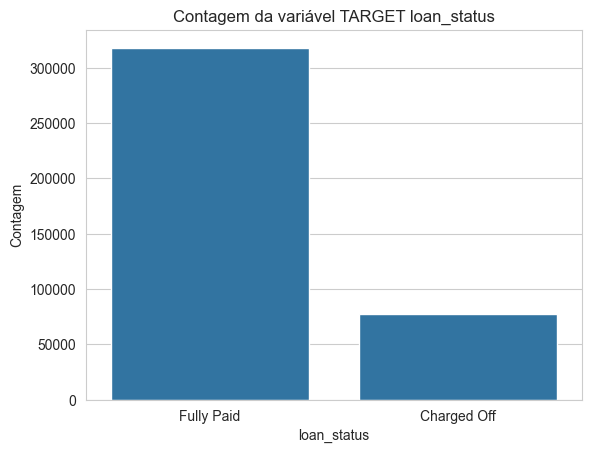

In [7]:
sns.countplot(df, x='loan_status')
plt.title("Contagem da variável TARGET loan_status")
plt.ylabel("Contagem")

Classe claramente desbalanceada, já poderia ser observado na descrição estatística das variáveis categóricas

<Axes: xlabel='loan_amnt', ylabel='Count'>

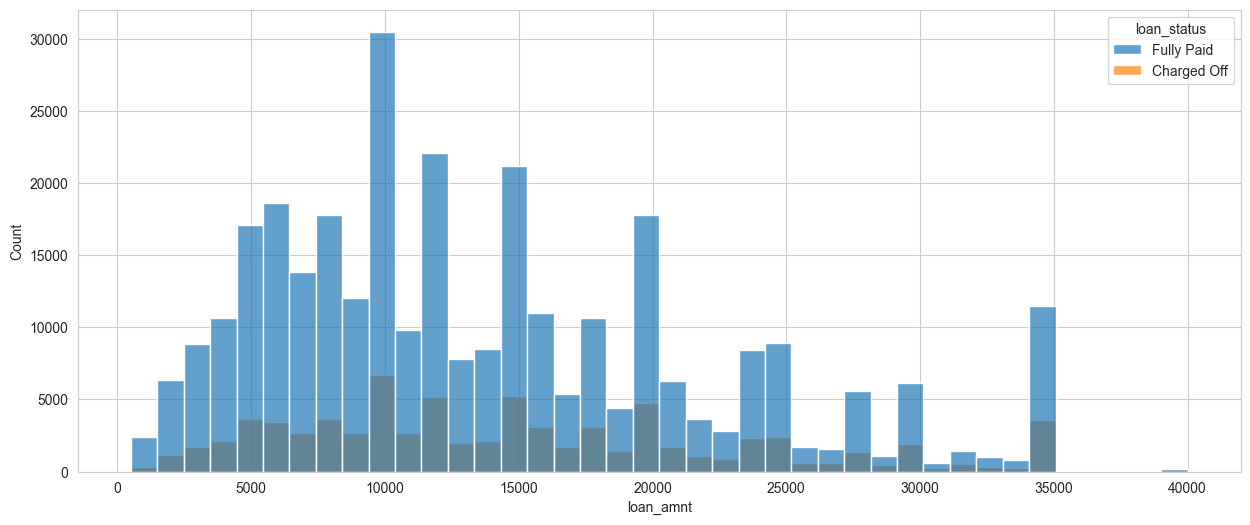

In [8]:
plt.figure(figsize=(15,6))
sns.histplot(df, x='loan_amnt', bins=40, hue='loan_status', alpha=0.7)


Distribuição da variável loan_amnt não é normal, possui uma cauda direita bastante pesada

In [9]:
df_corr = df.select_dtypes(exclude='object').corr()

<Axes: >

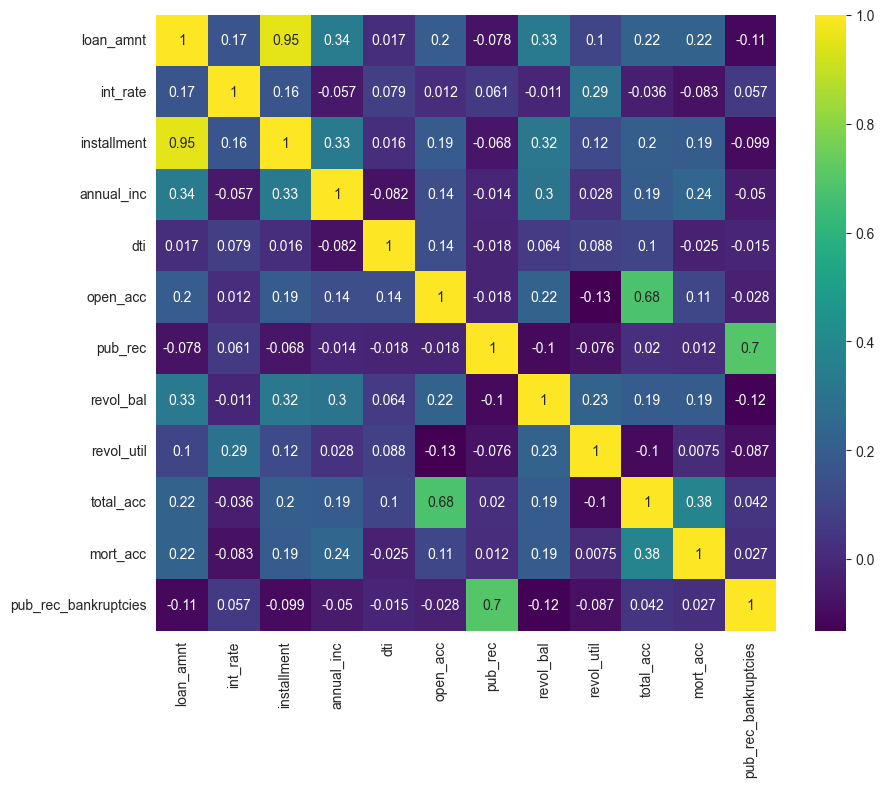

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(df_corr, annot=True, cmap='viridis')

O máximo de correlação observada entre as variáveis é de 0.95 entre annual_inc e loan_amnt, seguido por 0.7 por pub_rec_bankrupcies com pub_rec e 0.68 por open_acc e total_acc, o resto são correlações de pouca significância. Além disso não há relações invertidas, ou seja, poucos valores negativos e próximos a -1.

/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


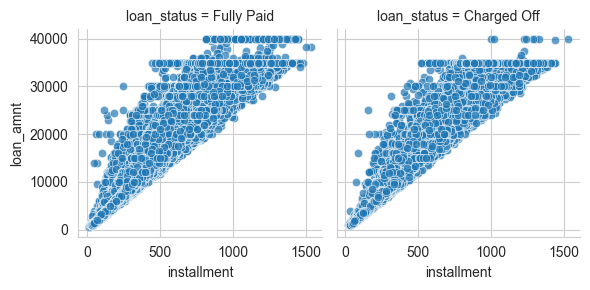

In [11]:
p = sns.FacetGrid(df, col='loan_status',)
p.map_dataframe(sns.scatterplot, x='installment', y='loan_amnt', alpha=0.7)

Essa relação entre as duas variáveis é clara. o que se pode tirar do gráfico anterior é que há uma grande variação de número de parcelas que as pessoas podem pagar o valor adquirido com o empréstimo. Por exemplo, 35k podem ser dividios em parcelas que variam de 400 até 1400.

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

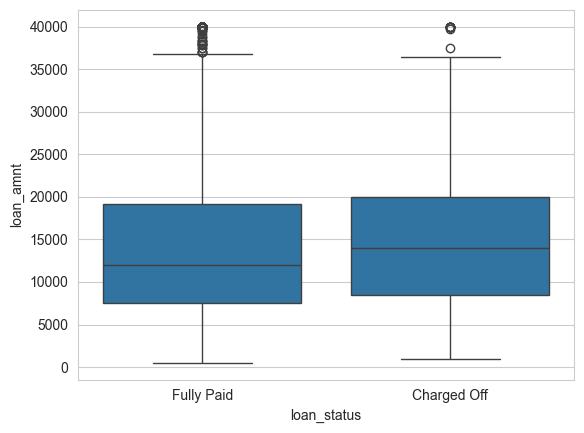

In [12]:
sns.boxplot(df, x='loan_status', y='loan_amnt')

In [13]:
df.groupby('loan_status').describe()['loan_amnt']

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


### Explorando Grade e Subgrade

In [14]:
grade = df['grade'].sort_values().unique()
print(*grade, sep=', ')

A, B, C, D, E, F, G


In [15]:
sub_grade = df['sub_grade'].sort_values().unique()
temp_list =[]

for n,g in enumerate(sub_grade):
    temp_list.append(g)
    if len(temp_list) == 5:
        print(temp_list)
        temp_list = []

['A1', 'A2', 'A3', 'A4', 'A5']
['B1', 'B2', 'B3', 'B4', 'B5']
['C1', 'C2', 'C3', 'C4', 'C5']
['D1', 'D2', 'D3', 'D4', 'D5']
['E1', 'E2', 'E3', 'E4', 'E5']
['F1', 'F2', 'F3', 'F4', 'F5']
['G1', 'G2', 'G3', 'G4', 'G5']


<Axes: xlabel='grade', ylabel='count'>

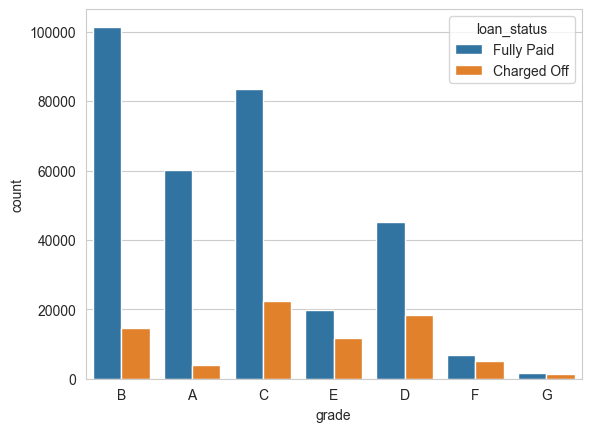

In [16]:
sns.countplot(df, x='grade', hue='loan_status')

/var/folders/nx/h3lp3lcs6s11kph621s_r81w0000gq/T/ipykernel_29185/2513906066.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df,x='sub_grade', order=sub_grade, palette='viridis',)


<Axes: xlabel='sub_grade', ylabel='count'>

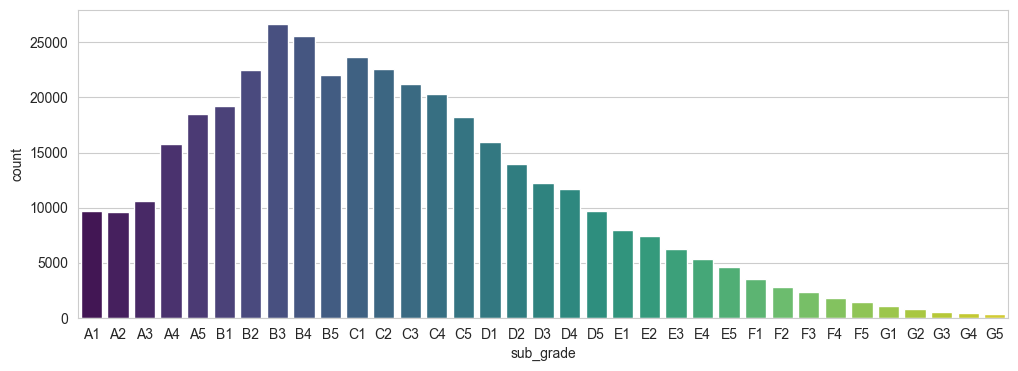

In [17]:
plt.figure(figsize=(12,4))
sns.countplot(df,x='sub_grade', order=sub_grade, palette='viridis',)

<Axes: xlabel='sub_grade', ylabel='count'>

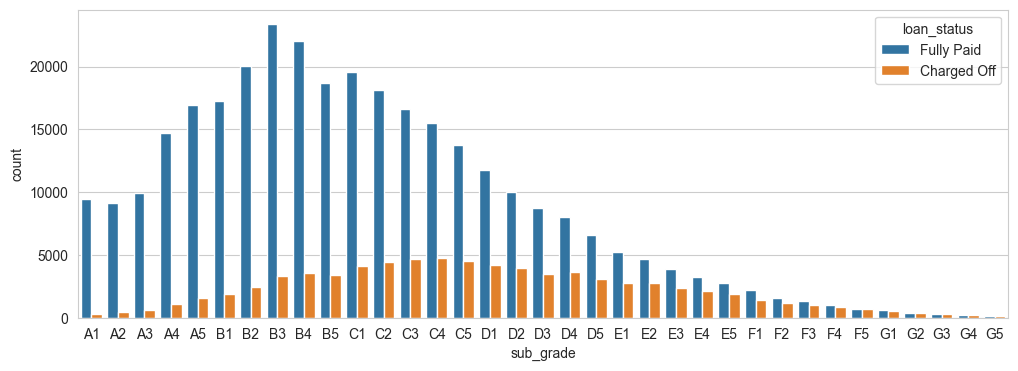

In [18]:
plt.figure(figsize=(12,4))
sns.countplot(df,x='sub_grade', order=sub_grade, hue='loan_status')

In [19]:
df_sub_grade = df.loc[(df['grade'] == "G") | (df['grade'] == "F" )]

<Axes: xlabel='sub_grade', ylabel='count'>

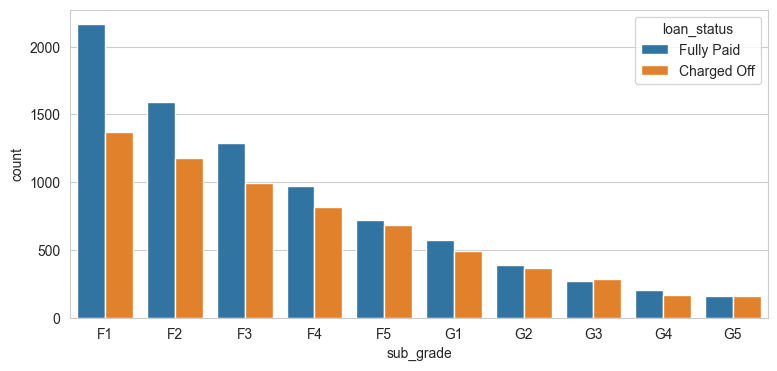

In [20]:
plt.figure(figsize=(9,4))
sns.countplot(df_sub_grade,x='sub_grade', order=sub_grade[25:], hue='loan_status')

In [21]:
df['loan_repaid'] =  df['loan_status'].apply(lambda x: 1 if x == 'Fully Paid' else 0)

In [22]:
df.loc[:,["loan_repaid", "loan_status"]]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


In [23]:
loan_repaid_corr = df.select_dtypes(exclude='object').corr()['loan_repaid'].sort_values()

In [24]:
loan_repaid_corr.index

Index(['int_rate', 'revol_util', 'dti', 'loan_amnt', 'installment', 'open_acc',
       'pub_rec', 'pub_rec_bankruptcies', 'revol_bal', 'total_acc',
       'annual_inc', 'mort_acc', 'loan_repaid'],
      dtype='object')

/var/folders/nx/h3lp3lcs6s11kph621s_r81w0000gq/T/ipykernel_29185/703894293.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_xticklabels(loan_repaid_corr.index, rotation=75)


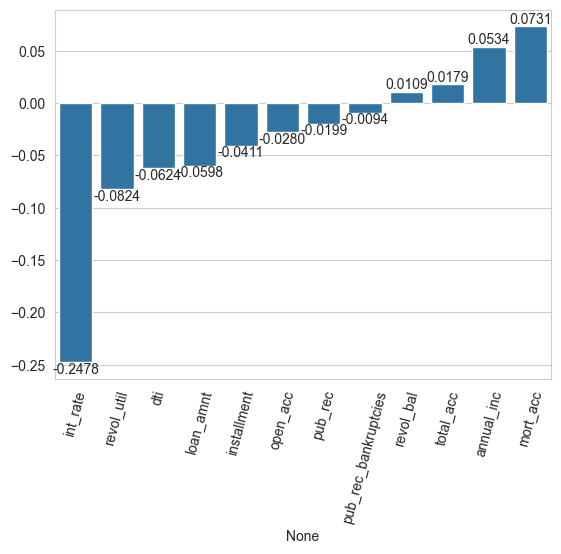

In [25]:
p = sns.barplot(y=loan_repaid_corr.values[:-1], x=loan_repaid_corr.index[:-1])
p.bar_label(p.containers[0], fontsize=10, fmt=lambda x: "{:,.4f}".format(x).replace(',','.'))
p.set_xticklabels(loan_repaid_corr.index, rotation=75)
plt.show()

### Pré processamento

In [26]:
linhas,colunas = df.shape
print(f"Num de linhas: {linhas:,.0f}")
print(f"Num de colunas: {colunas}")

Num de linhas: 396,030
Num de colunas: 28


In [27]:
print("porcentagem de linhas nulas em cada coluna")
round(df.isnull().sum()*100/linhas, 2)

porcentagem de linhas nulas em cada coluna


loan_amnt               0.00
term                    0.00
int_rate                0.00
installment             0.00
grade                   0.00
sub_grade               0.00
emp_title               5.79
emp_length              4.62
home_ownership          0.00
annual_inc              0.00
verification_status     0.00
issue_d                 0.00
loan_status             0.00
purpose                 0.00
title                   0.44
dti                     0.00
earliest_cr_line        0.00
open_acc                0.00
pub_rec                 0.00
revol_bal               0.00
revol_util              0.07
total_acc               0.00
initial_list_status     0.00
application_type        0.00
mort_acc                9.54
pub_rec_bankruptcies    0.14
address                 0.00
loan_repaid             0.00
dtype: float64

Começando a investigar emp_title e emp_length

title: qual é a ocupação daquele que procura o empréstimo

length: a quanto tempo exerce essa ocupação (0 é menos de um ano e 10 é >= 10)

In [28]:
print(f"Existem o total de {df['emp_title'].nunique():,.0f} ocupações diferentes")

Existem o total de 173,105 ocupações diferentes


já se sabia que Teacher é a ocupação mais comum

In [29]:
df['emp_title'].value_counts()

emp_title
Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: count, Length: 173105, dtype: int64

Pela quantidade grande de categorias, optarei por remover esta coluna, já que se torna inviável a sua categorização.

In [30]:
df = df.drop('emp_title', axis=1)

In [31]:
empt_length_order = ['< 1 year', '1 year', '2 years', '3 years', '4 years',
                     '5 years', '6 years', '7 years', '8 years','9 years', '10+ years' ]

In [32]:
df['emp_length'] = df['emp_length'].astype('category')
df['emp_length'] = df['emp_length'].cat.set_categories(empt_length_order)

/var/folders/nx/h3lp3lcs6s11kph621s_r81w0000gq/T/ipykernel_29185/2122907349.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_xticklabels(labels = empt_length_order,rotation=45)


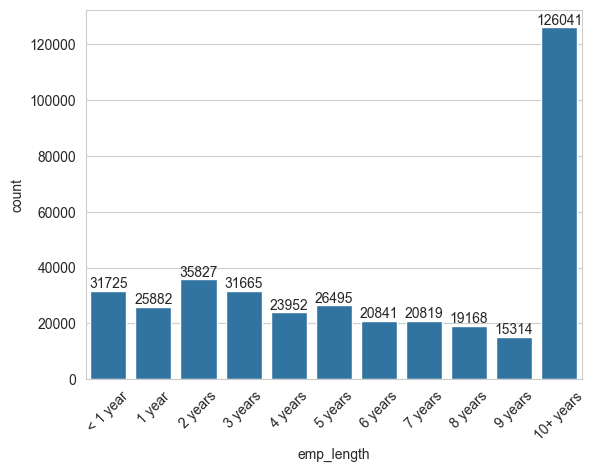

In [33]:
p = sns.countplot(df.sort_values('emp_length'), x='emp_length')

p.bar_label(p.containers[0], fontsize=10)
p.set_xticklabels(labels = empt_length_order,rotation=45)
plt.show()

/var/folders/nx/h3lp3lcs6s11kph621s_r81w0000gq/T/ipykernel_29185/3266862958.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_xticklabels(labels = empt_length_order,rotation=45)


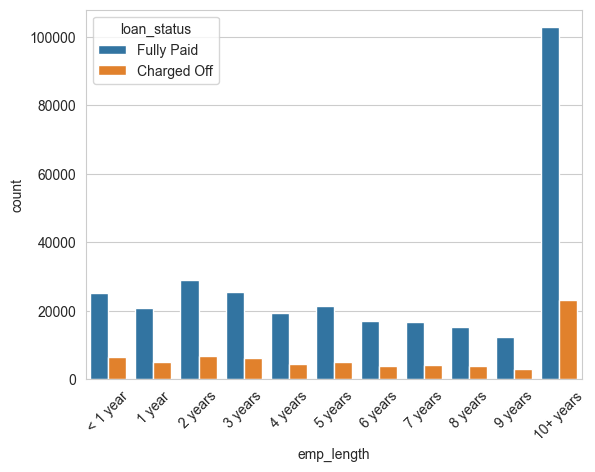

In [34]:
p = sns.countplot(df.sort_values('emp_length'), x='emp_length', hue='loan_status')
p.set_xticklabels(labels = empt_length_order,rotation=45)
plt.show()

In [35]:
df['loan_status_bin'] = df['loan_status'].apply(lambda x: 1 if x == "Fully Paid" else 0)

In [36]:
df = df.sort_values('emp_length').copy()

In [37]:
total_emp_length = pd.DataFrame(df['emp_length'].value_counts().sort_index())

In [38]:
total_emp_length

,count
emp_length,
< 1 year,31725
1 year,25882
2 years,35827
3 years,31665
4 years,23952
5 years,26495
6 years,20841
7 years,20819
8 years,19168


In [39]:
df.loc[:,['loan_status', 'loan_status_bin']]

,loan_status,loan_status_bin
265913,Fully Paid,1
231287,Fully Paid,1
321150,Fully Paid,1
304622,Fully Paid,1
197860,Fully Paid,1
...,...,...
395946,Fully Paid,1
395963,Fully Paid,1
395988,Fully Paid,1
395999,Charged Off,0


In [40]:
total_emp_length['fully_paid_emp_length'] = df.loc[:,['loan_status_bin', 'emp_length']].groupby('emp_length').sum().to_numpy()

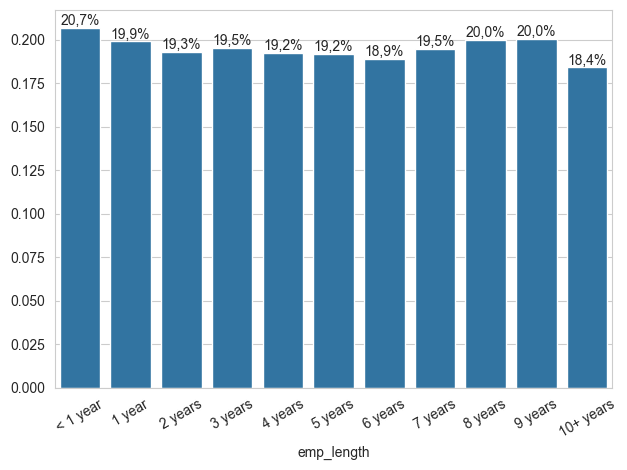

In [41]:
p = sns.barplot(total_emp_length.apply(lambda x: 1- x[1]/x[0], axis=1), )
p.bar_label(p.containers[0],  fmt=lambda x: "{:,.1%}".format(x).replace('.',','))
plt.xticks(rotation=30)
plt.tight_layout()

In [42]:
df = df.drop('emp_length', axis=1)

In [43]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
loan_status_bin             0
dtype: int64

Checando a coluna purpose

In [44]:
for i,n in enumerate(df['purpose'].unique()):
    print(i,n)

0 debt_consolidation
1 credit_card
2 moving
3 home_improvement
4 educational
5 vacation
6 other
7 car
8 major_purchase
9 house
10 small_business
11 wedding
12 renewable_energy
13 medical


In [45]:
for i,n in enumerate(df['title'].unique()):
    print(i,n)

0 Debt consolidation
1 Lower Rate
2 Consolidation
3 Moving and relocation
4 Credit card refinancing
5 CC Consolidation
6 Moving relocation
7 Debt Consolidation
8 Home improvement
9 Post-Graduate Internship Funding
10 vacation loan
11 lending loan
12 Other
13 pay off credit cards
14 home renovation
15 Car financing
16 credit card consol
17 Credit Card and Car loan
18 Credit card payoff
19 Jo's Debt Consolidation
20 Personal 
21 debt consolidation
22 Lower Interest Rates / Home Improvements
23 Student Loan Consolidation
24 Major purchase
25 Home buying
26 Consolidate
27 Consolidation 
28 CAR LOAN
29 My Loan
30 Successful Business boost 
31 Credit Card Payoff Loan
32 lending club loan
33 personal loan
34 Medical education relocation loan
35 Credit Card
36 home
37 Wedding Loan
38 Debt Consolidation Loan
39 Consolidated Service
40 Debt Pay Consolodation
41 Moving
42 Home Improvement 
43 paying debts
44 Loan Consolidation
45 College Clean up
46 Business
47 Loan
48 Amex repayment
49 Major Pur

In [46]:
df = df.drop('title', axis=1)

Investigando mort_acc

In [47]:
df['mort_acc'].info()

<class 'pandas.core.series.Series'>
Index: 396030 entries, 265913 to 396015
Series name: mort_acc
Non-Null Count   Dtype  
--------------   -----  
358235 non-null  float64
dtypes: float64(1)
memory usage: 6.0 MB


In [48]:
df[['mort_acc']].head()

,mort_acc
265913,0.0
231287,NaN
321150,0.0
304622,0.0
197860,3.0


In [49]:
df['mort_acc'].value_counts()

mort_acc
0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
31.0         2
26.0         2
34.0         1
30.0         1
28.0         1
Name: count, dtype: int64

In [50]:
df.select_dtypes(exclude='object').corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
loan_status_bin         0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

Vamos tentar preencher o campo mort_acc através do campo total_acc

In [51]:
temp_dict = df[['total_acc', 'mort_acc']].groupby('total_acc').mean().to_dict()
total_acc_dict = temp_dict['mort_acc']

In [52]:
total_acc_dict

{2.0: 0.0,
 3.0: 0.05202312138728324,
 4.0: 0.0667433831990794,
 5.0: 0.10328947368421053,
 6.0: 0.15129310344827587,
 7.0: 0.22169531713100177,
 8.0: 0.30842176563558366,
 9.0: 0.36549925484351714,
 10.0: 0.4291584233754375,
 11.0: 0.5265700483091788,
 12.0: 0.6180337405468296,
 13.0: 0.7221235238791932,
 14.0: 0.8034818530539982,
 15.0: 0.9401418178469473,
 16.0: 1.0074047954866008,
 17.0: 1.1512688671421463,
 18.0: 1.235884973673552,
 19.0: 1.3580128970623357,
 20.0: 1.4093803385618886,
 21.0: 1.5199317512021095,
 22.0: 1.6407356109572175,
 23.0: 1.7217944688874922,
 24.0: 1.8458673428956336,
 25.0: 1.9005057623745958,
 26.0: 1.9874138957394336,
 27.0: 2.1035730039700042,
 28.0: 2.1630495269894268,
 29.0: 2.2310434531265053,
 30.0: 2.3313858138581387,
 31.0: 2.3901044529961517,
 32.0: 2.4780095216504194,
 33.0: 2.5416821503778024,
 34.0: 2.589579158316633,
 35.0: 2.6506270049577134,
 36.0: 2.78726035868893,
 37.0: 2.7606275303643724,
 38.0: 2.8594635436343028,
 39.0: 2.8505976095617

In [53]:
df[['total_acc','mort_acc']].head()

,total_acc,mort_acc
265913,27.0,0.0
231287,14.0,NaN
321150,16.0,0.0
304622,16.0,0.0
197860,14.0,3.0


In [54]:
def fill_na_total_acc(x, total_acc_dict):
    if pd.isna(x[1]):
        return total_acc_dict[x[0]]
    return x[1]


In [55]:
df['mort_acc'] = df[['total_acc','mort_acc']].apply(fill_na_total_acc, axis=1, args=([total_acc_dict]))

In [56]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
loan_status_bin           0
dtype: int64

Deletarei as duas últimas colunas com valores faltantes pela falta de representatividade

In [57]:
df = df.drop(['revol_util', 'pub_rec_bankruptcies'], axis=1)

In [58]:
df.isnull().sum()

loan_amnt              0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
purpose                0
dti                    0
earliest_cr_line       0
open_acc               0
pub_rec                0
revol_bal              0
total_acc              0
initial_list_status    0
application_type       0
mort_acc               0
address                0
loan_repaid            0
loan_status_bin        0
dtype: int64

### Variáveis categóricas e dummies

In [59]:
df.select_dtypes('object').columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [60]:
df['term'] = df['term'].apply(lambda x: x.strip())

[Text(0, 0, '94025'), Text(0, 0, '302005')]

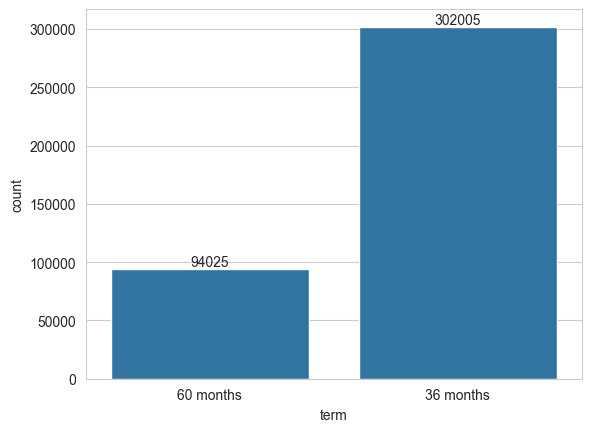

In [61]:
p = sns.countplot(df, x='term')
p.bar_label(p.containers[0])

In [62]:
def transform_term_feature(x):
    if x == "60 months":
        return 60
    elif x == "36 months":
        return 36

In [63]:
df['term'] = df['term'].apply(transform_term_feature)

Sabe-se que grade e sub_grade trazem a mesma informação

In [64]:
df = df.drop('grade', axis=1)

Transformando sub_grade em dummy

In [65]:
df = pd.concat([df, pd.get_dummies(df['sub_grade'], drop_first=True)], axis=1)

In [66]:
df = df.drop('sub_grade', axis=1)

In [67]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'address', 'loan_repaid', 'loan_status_bin', 'A2', 'A3',
       'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5',
       'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2',
       'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5'],
      dtype='object')

In [68]:
df.select_dtypes('object').columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

Transformando verification_status, application_type, initial_list_status e purpose em dummies

In [69]:
df[['verification_status', 'application_type','initial_list_status','purpose'] ]

,verification_status,application_type,initial_list_status,purpose
265913,Verified,INDIVIDUAL,f,debt_consolidation
231287,Source Verified,INDIVIDUAL,f,credit_card
321150,Not Verified,INDIVIDUAL,f,credit_card
304622,Verified,INDIVIDUAL,f,moving
197860,Verified,INDIVIDUAL,f,credit_card
...,...,...,...,...
395946,Verified,INDIVIDUAL,w,debt_consolidation
395963,Verified,INDIVIDUAL,w,medical
395988,Verified,INDIVIDUAL,w,debt_consolidation
395999,Verified,INDIVIDUAL,w,other


In [70]:
df[['verification_status', 'application_type','initial_list_status','purpose'] ].nunique()

verification_status     3
application_type        3
initial_list_status     2
purpose                14
dtype: int64

In [71]:
temp_df = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose'] ], drop_first=True)

In [72]:
df = pd.concat([df, temp_df], axis=1)

In [73]:
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'], axis=1)

In [74]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'issue_d', 'loan_status', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'mort_acc', 'address',
       'loan_repaid', 'loan_status_bin', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2',
       'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4',
       'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1',
       'G2', 'G3', 'G4', 'G5', 'verification_status_Source Verified',
       'verification_status_Verified', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'initial_list_status_w',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding'],
      dtype

Analisando home_ownership

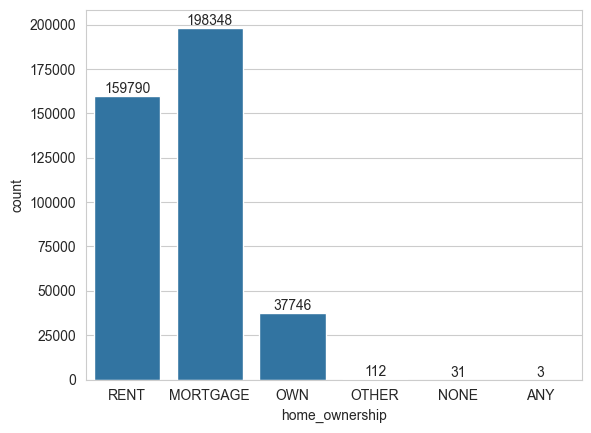

In [75]:
p = sns.countplot(df, x='home_ownership')
p.bar_label(p.containers[0])
plt.show()

In [76]:
df['home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [77]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: count, dtype: int64

In [78]:
def transform_home_ownership_feature(x):
    if pd.isna(x) or x == "ANY" or x=="NONE":
        return "OTHER"
    else:
        return x

In [79]:
df['home_ownership'] = df['home_ownership'].apply(transform_home_ownership_feature)

<Axes: xlabel='count', ylabel='home_ownership'>

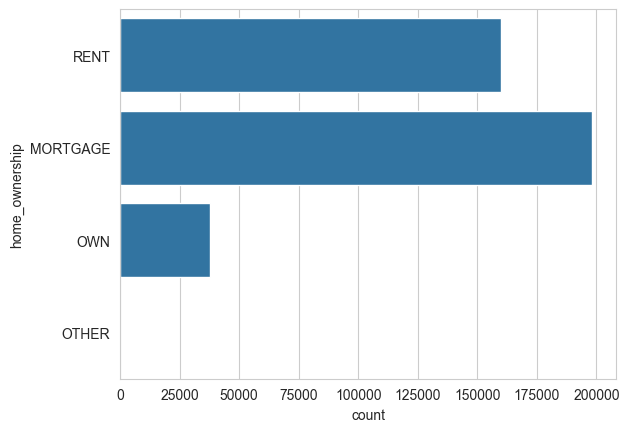

In [80]:
sns.countplot(df['home_ownership'])

In [81]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          146
Name: count, dtype: int64

In [82]:
df = pd.concat([df, pd.get_dummies(df['home_ownership'], drop_first=True)], axis=1)

In [83]:
df = df.drop('home_ownership', axis=1)

In [84]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'total_acc', 'mort_acc', 'address', 'loan_repaid',
       'loan_status_bin', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5', 'verification_status_Source Verified',
       'verification_status_Verified', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'initial_list_status_w',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTHER', 'OWN', 'RENT'],
     

Verificando a coluna Address

In [85]:
df['address'].head()

265913    7573 Hawkins Radial\nChristopherborough, CT 05113
231287           2130 Howard Crossing\nSouth Paul, WA 48052
321150       26432 Mark Stravenue\nPort Gabriella, MI 00813
304622    4221 Christie Route Suite 086\nNorth Robertche...
197860               879 Jackson Ramp\nEast James, AK 29597
Name: address, dtype: object

In [86]:
df['zip_code'] = df['address'].apply(lambda x: x.split(' ')[-1])

In [87]:
temp_df = pd.get_dummies(df['zip_code'], drop_first=True)
df = pd.concat([df.drop('zip_code', axis=1), temp_df], axis=1)

In [88]:
df = df.drop('address', axis=1)

Verificando a coluna issue_d: não é o tipo de informacão que saberíamos ou teríamos num caso real, então será apagada

In [89]:
df = df.drop('issue_d', axis=1)

Verificando earliest_cr_line

In [90]:
df['earliest_cr_line'].head()

265913    Feb-1999
231287    Dec-2001
321150    Jan-1996
304622    Jan-1973
197860    Sep-1991
Name: earliest_cr_line, dtype: object

Pegarei apenas a inforamação de ano

In [91]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda x: int(x.split('-')[-1]))

In [92]:
df = df.drop('earliest_cr_line', axis=1)

In [93]:
df['earliest_cr_year']

265913    1999
231287    2001
321150    1996
304622    1973
197860    1991
          ... 
395946    2001
395963    2004
395988    1983
395999    1989
396015    1977
Name: earliest_cr_year, Length: 396030, dtype: int64

Apagando a coluna loan_status, já que a coluna loan_repaid tem a mesma informação

In [94]:
df[['loan_repaid', 'loan_status']]

,loan_repaid,loan_status
265913,1,Fully Paid
231287,1,Fully Paid
321150,1,Fully Paid
304622,1,Fully Paid
197860,1,Fully Paid
...,...,...
395946,1,Fully Paid
395963,1,Fully Paid
395988,1,Fully Paid
395999,0,Charged Off


In [95]:
df = df.drop('loan_status', axis=1)

### Separação dos dados

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
df.shape

(396030, 78)

In [98]:
X = df.drop('loan_repaid', axis=1)
y = df['loan_repaid']

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### Normalização dos dados

In [100]:
from sklearn.preprocessing import MinMaxScaler

In [101]:
scaler = MinMaxScaler()

In [102]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Modelagem dos dados

In [103]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [104]:
model = Sequential()

In [105]:
model.add(Dense(38, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(9, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [106]:
model.fit(X_train, y_train,epochs=25, validation_data=(X_test,y_test),
          batch_size=256)

Epoch 1/25
1238/1238 [==============================] - 1s 947us/step - loss: 0.0530 - val_loss: 2.2559e-07
Epoch 2/25
1238/1238 [==============================] - 1s 882us/step - loss: 0.0013 - val_loss: 1.5157e-09
Epoch 3/25
1238/1238 [==============================] - 1s 886us/step - loss: 0.0013 - val_loss: 8.1462e-11
Epoch 4/25
1238/1238 [==============================] - 1s 878us/step - loss: 0.0011 - val_loss: 7.1604e-12
Epoch 5/25
1238/1238 [==============================] - 1s 884us/step - loss: 8.8530e-04 - val_loss: 4.4961e-13
Epoch 6/25
1238/1238 [==============================] - 1s 917us/step - loss: 7.4680e-04 - val_loss: 1.8789e-12
Epoch 7/25
1238/1238 [==============================] - 1s 890us/step - loss: 5.5656e-04 - val_loss: 2.1400e-14
Epoch 8/25
1238/1238 [==============================] - 1s 895us/step - loss: 4.3625e-04 - val_loss: 1.0893e-14
Epoch 9/25
1238/1238 [==============================] - 1s 885us/step - loss: 3.5367e-04 - val_loss: 1.5144e-15
Epoch 10

In [107]:
losses = pd.DataFrame(model.history.history)

<Axes: >

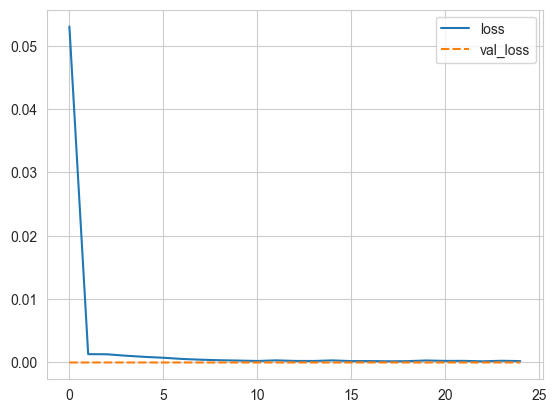

In [108]:
sns.lineplot(losses)

### Predições

In [109]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [110]:
pred = model.predict(X_test)

2476/2476 [==============================] - 1s 294us/step


In [111]:
pred

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [112]:
pred.shape

(79206, 1)

In [113]:
pred = np.round(pred,0)

In [114]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[15567     0]
 [    0 63639]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15567
           1       1.00      1.00      1.00     63639

    accuracy                           1.00     79206
   macro avg       1.00      1.00      1.00     79206
weighted avg       1.00      1.00      1.00     79206



In [115]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt            9300.0
term                     36
int_rate               16.2
installment          327.88
annual_inc          51000.0
                     ...   
48052                 False
70466                 False
86630                 False
93700                 False
earliest_cr_year       1998
Name: 128261, Length: 77, dtype: object

In [116]:
new_customer = np.asarray(new_customer).astype('float32').reshape(1,len(new_customer))

In [117]:
new_customer = scaler.transform(new_customer)

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [118]:
print(new_customer)

[[0.22278482 0.         0.42384106 0.20543839 0.00585764 0.00236524
  0.12222222 0.         0.00382743 0.12751678 0.         1.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         1.         0.
  1.         0.         1.         0.         1.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  1.         0.         0.         0.         0.         1.
  0.         0.         0.         0.         0.7826089 ]]


In [119]:
model.predict(new_customer)

1/1 [==============================] - 0s 10ms/step


array([[1.]], dtype=float32)

In [120]:
df['loan_repaid'][random_ind]

1